In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [77]:
def get_num_of_occurences(X):
    dicto = {}
    for i in range(len(X)):
        if X[i] in dicto:
            dicto[X[i]] += 1
        else:
            dicto[X[i]] = 1
    return dicto



In [78]:
def get_freq(X):
    sum_tot = len(X)
    set_x = list(set(X))
    S = sorted(set_x)
    dicte = get_num_of_occurences(X)
    freq = []
    s = 0
    for i in range(len(S)):
        s += dicte[S[i]]
        freq.append(s/sum_tot)
    return S, freq


In [79]:
X = [2,1,1,6,5,5,5]
get_freq(X)

([1, 2, 5, 6],
 [0.2857142857142857, 0.42857142857142855, 0.8571428571428571, 1.0])

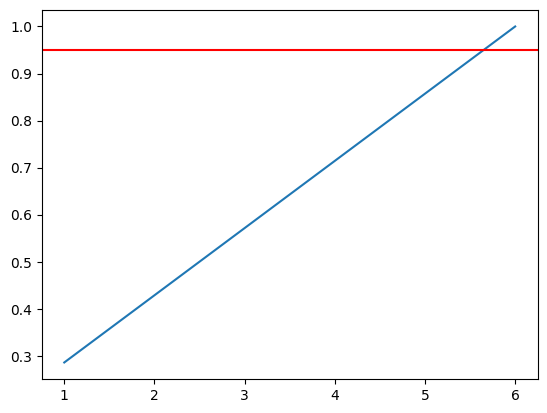

In [80]:
x, y = get_freq(X)
plt.plot(x, y)
plt.axhline(0.95, color = 'r')

In [81]:
def get_quart(X, alpha):
    x,y = get_freq(X)
    for i in range(len(x)):
        if y[i] >= alpha:
            return x[i]
        
def VaR(X, alpha):
    return -get_quart(X, 1-alpha)

def troncat(x):
    return int(x)+ (int(x*10)%10)/10

In [101]:
import numpy.random as sim
data = [troncat(-10+2*sim.randn()) for i in range(10000)]
VaR(data, 0.9)

11.6

In [102]:
def TVaR(data, alpha, n):
    betas = np.linspace(alpha, 1, n)
    s = 0
    for x in betas:
        s+= VaR(data, x)

    return s/n


In [106]:
TVaR(data, 0.9,1000)

12.552799999999996

Reprendre les données des actions du CAC40 de l'exercice en gestion de portefeuille
On va resoudre le pb suivant de minimisation:

min Ro(R*)
ER* >= 5% annuel

R* = Rx
Ro(R*) = VaR95%(R*)